In [1]:
se_f = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/enrichment/annotation_clones/SE.rds"
outdir = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/enrichment/annotation_clones/DE_large"
n_donors = 4
# se_f = "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/SE.rds"
# outdir = "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large"

# If more than 2 clones pass the cdf_thresh, use that, o.w use n_top_clones
cdf_thresh = 0.5
n_top_clones = 3

genome = "/data2/mito_lineage/data/external/GRCh38_MT_blacklist/fasta/genome.fa"
cores=16
utils_script <- "/data2/mito_lineage/R_scripts/seurat_utils.R"

In [2]:
# Parameters
se_f = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/enrichment/annotation_clones/SE.rds"
outdir = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/enrichment/annotation_clones/DE_large"
n_donors = 4


In [3]:
source(utils_script)

Attaching SeuratObject



In [4]:
library(Seurat)
library(Signac)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)
plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)
library("ComplexHeatmap")


Attaching package: ‘cowplot’




The following object is masked from ‘package:patchwork’:

    align_plots





Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


Loading required package: grid



ComplexHeatmap version 2.9.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




## Import seurat object

In [5]:
if (file.exists(file.path(outdir, "se.chromvar.rds"))){
    print("Loading se with chromvar")
    se <- readRDS(file=file.path(outdir, "se.chromvar.rds"))    
}else{
    print("Running chromvar")
    se = readRDS(se_f)
#     source("/data2/mito_lineage/R_scripts/addPWM.R")
    se <- get.pwm(se, genome=genome)
    saveRDS(object=se, file=file.path(outdir, "se.chromvar.rds"))    
}
# print("Running chromvar")
# se = readRDS(se_f)
# source("/data2/mito_lineage/R_scripts/addPWM.R")
# se <- get.pwm(se, genome=genome)
# saveRDS(object=se, file=file.path(outdir, "se.chromvar.rds"))


# cells.meta = se[[]]
# cells.meta$name = paste0(cells.meta$donor,"_", cells.meta$lineage)
# cells.meta$name = factor(cells.meta$name)
# cells.meta


# se <- AddMetaData(
#   object = se,
#   metadata = cells.meta["name"],
#   col.name = "name"
# )
# se[[]]

[1] "Running chromvar"


Loading required package: BSgenome



Loading required package: BiocGenerics



Loading required package: parallel




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB




The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min




Loading required package: S4Vectors



Loading required package: stats4




Attaching package: ‘S4Vectors’




The following object is masked from ‘package:future’:

    values




The following objects are masked from ‘package:dplyr’:

    first, rename




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges




Attaching package: ‘IRanges’




The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice




Loading required package: GenomeInfoDb



Loading required package: GenomicRanges



Loading required package: Biostrings



Loading required package: XVector




Attaching package: ‘Biostrings’




The following object is masked from ‘package:grid’:

    pattern




The following object is masked from ‘package:base’:

    strsplit




Loading required package: rtracklayer



Building motif matrix



Finding motif positions



Creating Motif object



Computing GC bias per region



Selecting background regions



Computing deviations from background



Constructing chromVAR assay



In [6]:
counts <- se[[]] %>%
          group_by(condition, donor, lineage, name) %>%
          summarize(size=n()) %>% filter(!name=="None")
counts

`summarise()` has grouped output by 'condition', 'donor', 'lineage'. You can override using the `.groups` argument.



condition,donor,lineage,name,size
<fct>,<fct>,<fct>,<fct>,<int>
Control,0,0,0_0,7
Control,0,1,0_1,4
Control,0,2,0_2,19
Control,0,3,0_3,185
Control,0,4,0_4,6
Control,0,5,0_5,14
Control,0,6,0_6,6
Control,0,7,0_7,23
Control,0,8,0_8,13


In [7]:
counts.norm <- counts %>% group_by(condition, donor) %>% mutate(total=sum(size)) %>% ungroup() %>% mutate(norm=size/total)

counts.norm 

condition,donor,lineage,name,size,total,norm
<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>
Control,0,0,0_0,7,492,0.014227642
Control,0,1,0_1,4,492,0.008130081
Control,0,2,0_2,19,492,0.038617886
Control,0,3,0_3,185,492,0.376016260
Control,0,4,0_4,6,492,0.012195122
Control,0,5,0_5,14,492,0.028455285
Control,0,6,0_6,6,492,0.012195122
Control,0,7,0_7,23,492,0.046747967
Control,0,8,0_8,13,492,0.026422764


In [8]:
counts.norm.sizes = counts.norm[order(counts.norm[,"norm"], decreasing=T),]
counts.norm.sizes

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


condition,donor,lineage,name,size,total,norm
<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>
Control,0,3,0_3,185,492,0.37601626
Control,1,16,1_16,75,341,0.21994135
Flt3l,1,16,1_16,140,743,0.18842530
Control,2,17,2_17,74,402,0.18407960
Control,1,19,1_19,50,341,0.14662757
Flt3l,0,11,0_11,95,650,0.14615385
Control,3,18,3_18,60,428,0.14018692
Flt3l,0,3,0_3,90,650,0.13846154
Flt3l,1,19,1_19,93,743,0.12516824


In [9]:
clone.sizes <- counts.norm.sizes %>% 
               group_by(donor,lineage) %>% 
               summarize(norm.total=sum(norm), total=sum(size)) %>% 
               arrange(desc(norm.total)) %>% 
               mutate(name=factor(paste0(donor,"_", lineage)))


clone.sizes

`summarise()` has grouped output by 'donor'. You can override using the `.groups` argument.



donor,lineage,norm.total,total,name
<fct>,<fct>,<dbl>,<int>,<fct>
0,3,0.5144778,275,0_3
1,16,0.4083667,215,1_16
1,19,0.2717958,143,1_19
2,17,0.2593934,110,2_17
3,18,0.2544133,170,3_18
0,11,0.2172921,130,0_11
2,9,0.1936447,85,2_9
1,11,0.1891594,104,1_11
3,2,0.1869159,120,3_2


In [10]:
clone.sizes <- clone.sizes %>% group_by(donor) %>% arrange(donor, desc(norm.total)) %>% 
                               mutate(cdf.norm=cumsum(norm.total)/2, cdf =cumsum(total),
                                      index=1:n()) %>% 
                               ungroup %>% arrange(donor, desc(norm.total)) 
#head(clone.sizes,100)

Saving 6.67 x 6.67 in image



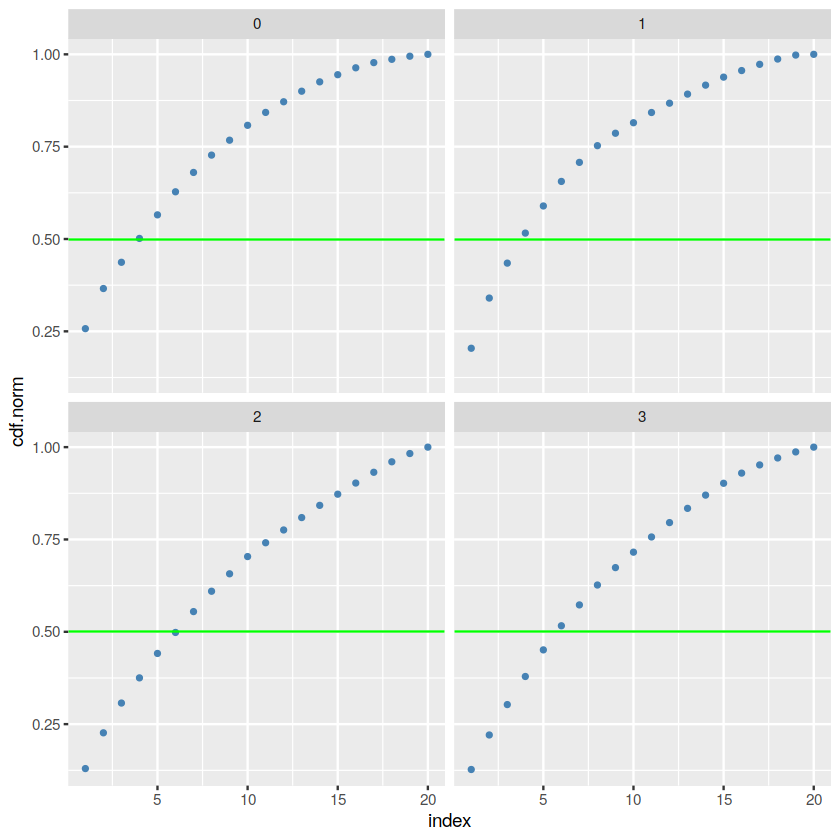

In [11]:
p <- ggplot(data = clone.sizes, aes(index, cdf.norm)) +
  geom_point(color = "steelblue", size = 1) +
  facet_wrap(~ donor) 

p <- p + geom_hline(yintercept=cdf_thresh, color='green') 
ggsave(file.path(outdir, "clones.cdf.png"))
p


In [12]:
min(clone.sizes$cdf.norm)
max(clone.sizes$cdf.norm)

[1] 0.1272066

[1] 1

In [13]:
clone.sizes

donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,3,0.51447780,275,0_3,0.2572389,275,1
0,11,0.21729206,130,0_11,0.3658849,405,2
0,7,0.14213258,85,0_7,0.4369512,490,3
0,19,0.12921826,75,0_19,0.5015604,565,4
0,10,0.12762351,73,0_10,0.5653721,638,5
0,14,0.12488430,77,0_14,0.6278143,715,6
0,2,0.10477173,62,0_2,0.6802001,777,7
0,18,0.09383365,52,0_18,0.7271169,829,8
0,5,0.08076298,48,0_5,0.7674984,877,9


In [14]:
large.clones <- clone.sizes %>% filter(cdf.norm<cdf_thresh)
large.clones <- check.if.one.clone(large.clones, clone.sizes, n_top_clones)
#large.clones$name = factor(paste0(large.clones$donor,"_", large.clones$lineage))
write.csv(large.clones, 
          file=file.path(outdir, "large_clones.csv"), quote=F)

large.clones

[1] 4
[1] "i 1 donor 1"
[1] "i 2 donor 2"
[1] "i 3 donor 3"
[1] "i 4 donor 4"


donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,3,0.5144778,275,0_3,0.2572389,275,1
0,11,0.2172921,130,0_11,0.3658849,405,2
0,7,0.1421326,85,0_7,0.4369512,490,3
1,16,0.4083667,215,1_16,0.2041833,215,1
1,19,0.2717958,143,1_19,0.3400812,358,2
1,11,0.1891594,104,1_11,0.4346609,462,3
2,17,0.2593934,110,2_17,0.1296967,110,1
2,9,0.1936447,85,2_9,0.2265191,195,2
2,18,0.1611919,71,2_18,0.3071151,266,3


Saving 6.67 x 6.67 in image



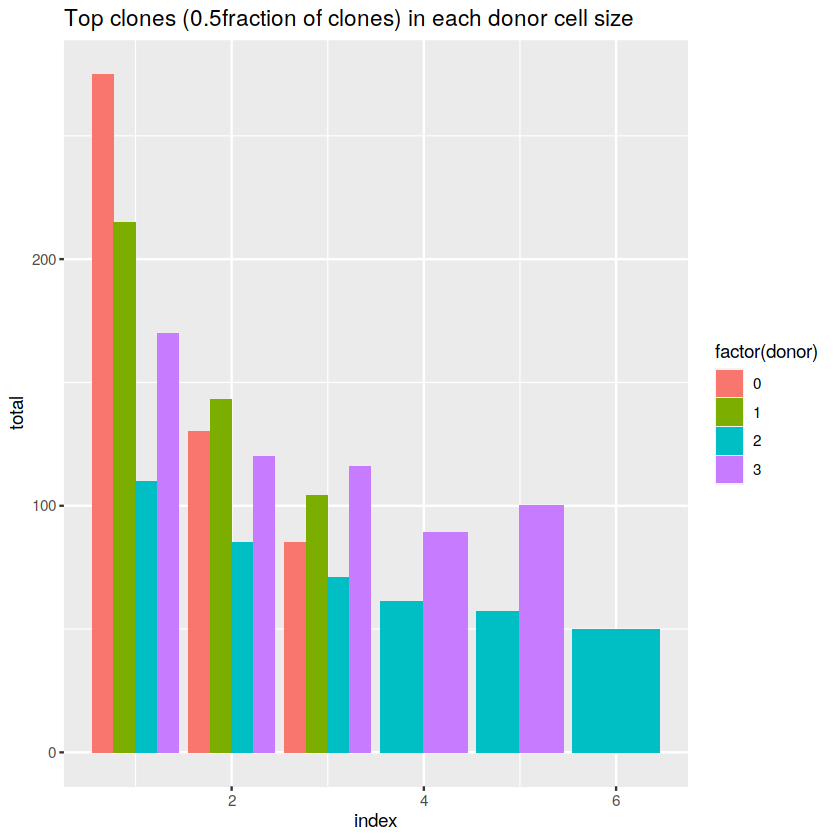

In [15]:
ggplot(data=large.clones, aes(x=index,y=total, fill = factor(donor))) + 
        geom_col(position='dodge') +
       ggtitle(paste0("Top clones (", cdf_thresh,
                      "fraction of clones) in each donor cell size"))

ggsave(file.path(outdir, "topClonesSize.png"))

## TF DE

## Filter se for cells in the large clones

In [16]:
large.clones

donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,3,0.5144778,275,0_3,0.2572389,275,1
0,11,0.2172921,130,0_11,0.3658849,405,2
0,7,0.1421326,85,0_7,0.4369512,490,3
1,16,0.4083667,215,1_16,0.2041833,215,1
1,19,0.2717958,143,1_19,0.3400812,358,2
1,11,0.1891594,104,1_11,0.4346609,462,3
2,17,0.2593934,110,2_17,0.1296967,110,1
2,9,0.1936447,85,2_9,0.2265191,195,2
2,18,0.1611919,71,2_18,0.3071151,266,3


In [17]:
se <- subset(se, subset= name %in% factor(large.clones$name))
se

An object of class Seurat 
170811 features across 1981 samples within 4 assays 
Active assay: chromvarnames (633 features, 0 variable features)
 3 other assays present: ATAC, RNA, chromvar
 2 dimensional reductions calculated: integrated_lsi, umap

In [18]:
saveRDS(object=se, file=file.path(outdir, "se.clonesfilt.rds"))    

## Run DE

In [19]:
for (d in 0:(n_donors-1)){
    print('donor')
    print(d)
    curr.outdir <- file.path(outdir, paste0("donor", d, "_TF"))
    dir.create(curr.outdir)
    donor.large.clones <- large.clones %>% filter(donor==d)
    clones.filt.ids <- sort(donor.large.clones$lineage)
    print('clones')
    print(clones.filt.ids)
    print(length(clones.filt.ids))
    se.filt <- subset(se, subset = (donor==d) & (lineage %in% donor.large.clones$lineage))
    Idents(se.filt) <- se.filt$lineage  
    print('se.filt')
    print(dim(se.filt[[]]))
    DefaultAssay(se.filt) <- "chromvarnames"
    pairs = combn(clones.filt.ids,2)
    for (i in 1:dim(combn(clones.filt.ids,2))[2]){
        print(pairs[,i])
        try({
            print(paste("clones", i))
            a = pairs[1,i]
            b = pairs[2,i]
            da <- FindMarkers(
              object = se.filt,
              ident.1 = a,
              ident.2 = b,
              only.pos = FALSE,
              mean.fxn = rowMeans,
              logfc.threshold = 0.1,
              min.pct = 0.01,
              fc.name = "avg_diff")
            write.csv(da, 
                      file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.csv")))

            #plotDE(se, da, c, clust_outdir)

    })
        }
    }

[1] "donor"
[1] 0
[1] "clones"
[1] 3  7  11
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] 3
[1] "se.filt"
[1] 490  46
[1] 3 7
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 1"


For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



[1] 3  11
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 2"
[1] 7  11
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 3"
[1] "donor"
[1] 1
[1] "clones"
[1] 11 16 19
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] 3
[1] "se.filt"
[1] 462  46
[1] 11 16
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 1"
[1] 11 19
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 2"
[1] 16 19
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 3"
[1] "donor"
[1] 2
[1] "clones"
[1] 1  2  9  17 18 19
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] 6
[1] "se.filt"
[1] 434  46
[1] 1 2
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 1"
[1] 1 9
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 2"
[1] 1  17
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 None
[1] "clones 3"
[1] 1  18
Lev